In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
Tdata=pd.read_csv('Telcom_Customer_Churn.csv')
Tdata.shape

(7043, 21)

In [4]:
Tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
def df_summary(df):
    df_u=df.nunique().to_frame().reset_index().rename(columns={0:'Unique data'})
    df_m=df.isnull().sum().to_frame().reset_index().rename(columns={0:'Missing data'})
    df_t=df.dtypes.to_frame().reset_index().rename(columns={0:'Data type'})
    
    output=pd.merge(pd.merge(df_u,df_m,on='index'),df_t,on='index')
    
    return output;

In [6]:
df_summary(Tdata)

,index,Unique data,Missing data,Data type
0,customerID,7043,0,object
1,gender,2,0,object
2,SeniorCitizen,2,0,int64
3,Partner,2,0,object
4,Dependents,2,0,object
5,tenure,73,0,int64
6,PhoneService,2,0,object
7,MultipleLines,3,0,object
8,InternetService,3,0,object
9,OnlineSecurity,3,0,object


In [7]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
Tdata.TotalCharges.sample(5)

3165     439.75
3808       54.7
4403    2045.55
2071     6302.8
6532      369.6
Name: TotalCharges, dtype: object

In [9]:
Tdata.TotalCharges=pd.to_numeric(Tdata.TotalCharges,errors='coerce')

In [10]:
Tdata.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
Tdata.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
Tdata.drop('customerID',axis=1,inplace=True)
Tdata.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
cat_cols=Tdata.select_dtypes(include=['object']).columns.to_list()
Num_cols=Tdata.select_dtypes(exclude=['object']).columns.to_list()

In [14]:
Num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
Tdata[Num_cols].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
Tdata.TotalCharges.fillna((Tdata.TotalCharges.mean()),inplace=True)

In [17]:
Tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
from matplotlib import style
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

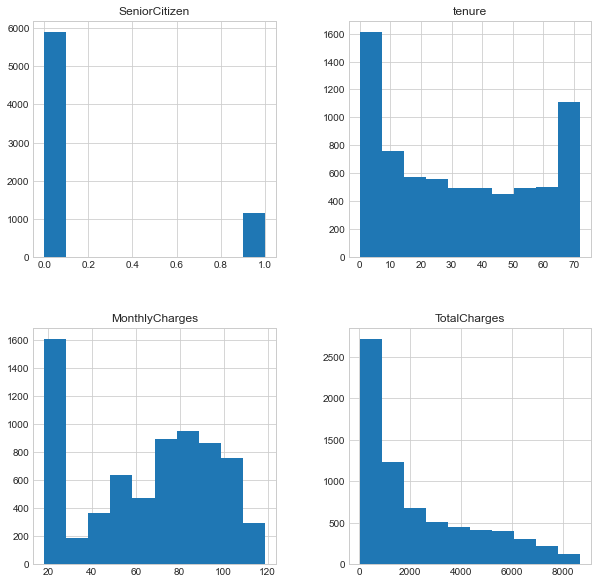

In [19]:
from matplotlib import style
style.use('seaborn-whitegrid')
Tdata[Num_cols].hist(figsize=(10,10));

In [20]:
def cat_cols_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")
cat_cols_desc(Tdata)

Variable : gender
Count of unique values : 2
Unique values :  {'Male', 'Female'}
Variable : Partner
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : Dependents
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : PhoneService
Count of unique values : 2
Unique values :  {'Yes', 'No'}
Variable : MultipleLines
Count of unique values : 3
Unique values :  {'No', 'Yes', 'No phone service'}
Variable : InternetService
Count of unique values : 3
Unique values :  {'No', 'Fiber optic', 'DSL'}
Variable : OnlineSecurity
Count of unique values : 3
Unique values :  {'Yes', 'No', 'No internet service'}
Variable : OnlineBackup
Count of unique values : 3
Unique values :  {'Yes', 'No', 'No internet service'}
Variable : DeviceProtection
Count of unique values : 3
Unique values :  {'Yes', 'No', 'No internet service'}
Variable : TechSupport
Count of unique values : 3
Unique values :  {'Yes', 'No', 'No internet service'}
Variable : StreamingTV
Count of unique values : 3
Un

<AxesSubplot:xlabel='Churn', ylabel='count'>

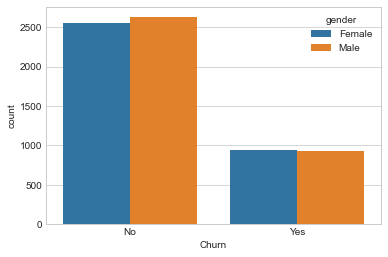

In [21]:
sns.countplot('Churn',data=Tdata,hue='gender')


In [22]:
Binary_class=Tdata[cat_cols].nunique()[Tdata[cat_cols].nunique()==2].keys().tolist()
Binary_class
Multi_class=Tdata[cat_cols].nunique()[Tdata[cat_cols].nunique()>2].keys().tolist()
Multi_class

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

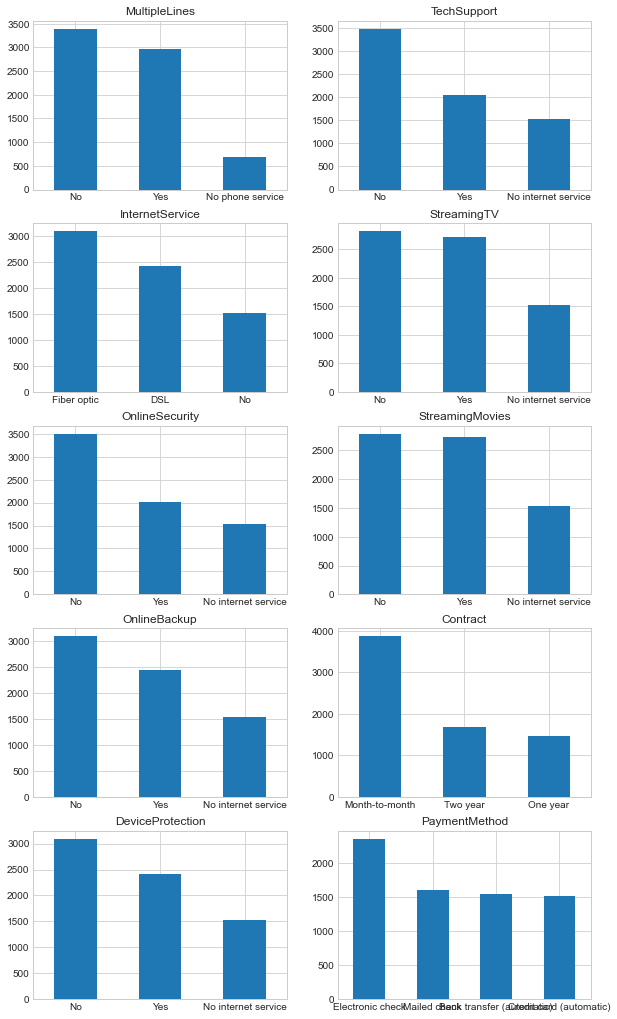

In [23]:
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(10,18))
for i, item in enumerate(Multi_class):
    if i<5:
        ax=Tdata[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=0)
    elif i>=5 and i<10:
        ax=Tdata[item].value_counts().plot(kind='bar',ax=axes[i-5,1],rot=0)
    
    ax.set_title(item)
        

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in Binary_class:
    Tdata[i]=le.fit_transform(Tdata[i])


In [25]:
Tdata[Binary_class]

,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0,1,0,0,1,0
1,1,0,0,1,0,0
2,1,0,0,1,1,1
3,1,0,0,0,0,0
4,0,0,0,1,1,1
...,...,...,...,...,...,...
7038,1,1,1,1,1,0
7039,0,1,1,1,1,0
7040,0,1,1,0,1,0
7041,1,1,0,1,1,1


In [26]:
Tdata[Binary_class].shape

(7043, 6)

In [27]:
Tdata_dummy=pd.get_dummies(Tdata[Multi_class])

In [28]:
Tdata_dummy.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [29]:
final_df=pd.concat([Tdata[Num_cols],Tdata_dummy,Tdata[Binary_class]],axis=1)

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   MultipleLines_No                         7043 non-null   uint8  
 5   MultipleLines_No phone service           7043 non-null   uint8  
 6   MultipleLines_Yes                        7043 non-null   uint8  
 7   InternetService_DSL                      7043 non-null   uint8  
 8   InternetService_Fiber optic              7043 non-null   uint8  
 9   InternetService_No                       7043 non-null   uint8  
 10  OnlineSecurity_No                        7043 no

In [31]:
index=final_df['Churn'].value_counts().index
values=final_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64


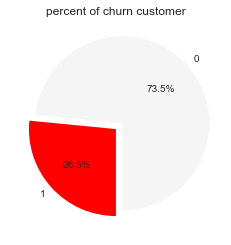

In [32]:
print(values)
plt.pie(values,labels=index,autopct='%1.1f%%',explode=(0.1,0),colors=['whitesmoke','red'],startangle=270)
plt.title('percent of churn customer')
plt.show();

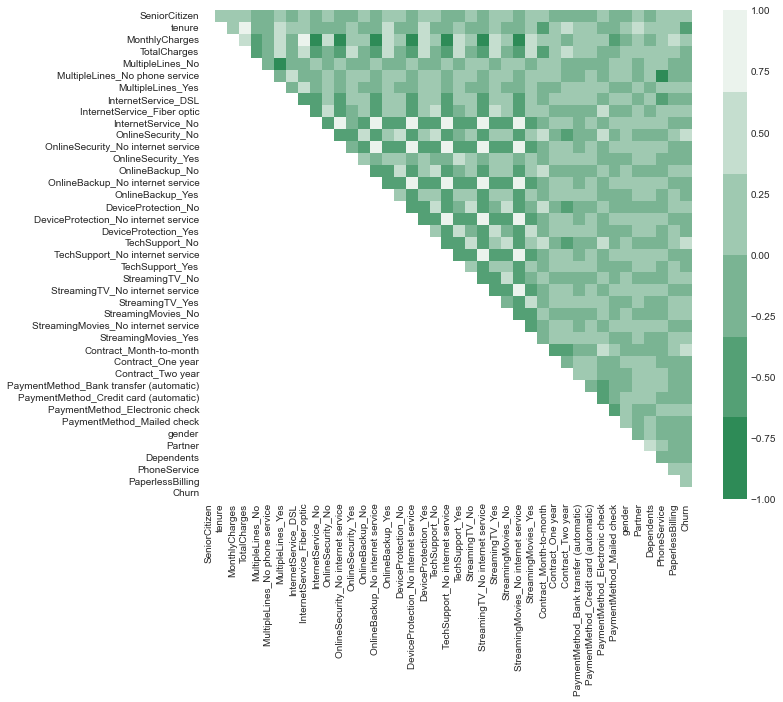

In [33]:
corr=final_df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
cmap=sns.light_palette('seagreen',reverse=True)
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(corr,cmap=cmap,center=0,square=True,mask=mask);

<AxesSubplot:>

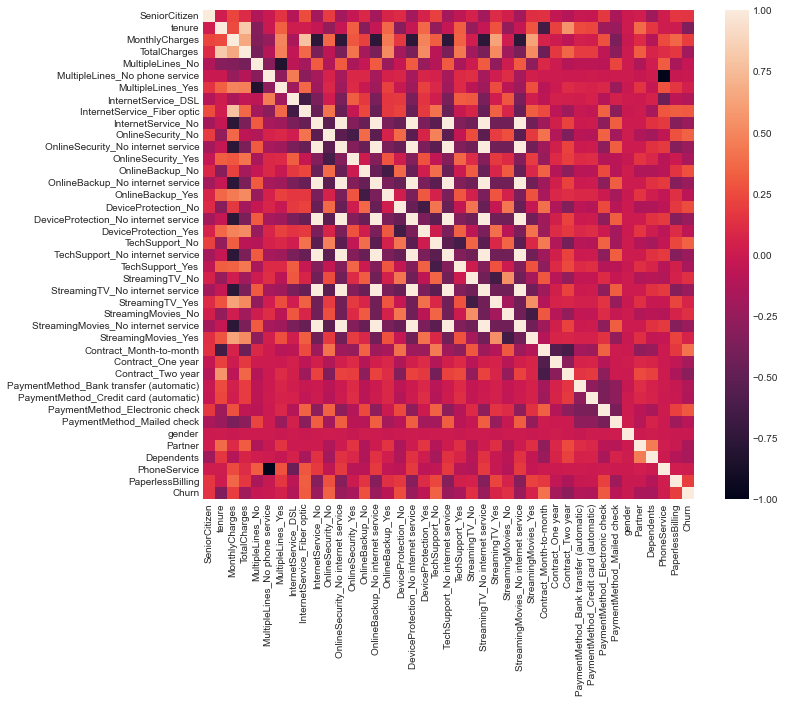

In [34]:
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(corr)

In [35]:
plt.figure(figsize=(10,10))
final_df.corr().style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,Partner,Dependents,PhoneService,PaperlessBilling,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477,-0.001874,0.016479,-0.211185,0.008576,0.156530,0.150889
tenure,0.016567,1.000000,0.247900,0.824757,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852,0.005106,0.379697,0.159712,0.008448,0.006152,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437,-0.014569,0.096848,-0.113890,0.247398,0.352150,0.193356
TotalCharges,0.102395,0.824757,0.650468,1.000000,-0.396457,-0.112851,0.468689,-0.052143,0.360547,-0.374263,-0.064465,-0.374263,0.412245,-0.177519,-0.374263,0.509692,-0.189362,-0.374263,0.522462,-0.084206,-0.374263,0.432480,-0.197030,-0.374263,0.515314,-0.202451,-0.374263,0.519574,-0.446348,0.170491,0.357224,0.185992,0.182581,-0.060412,-0.294125,0.000048,0.318812,0.064535,0.112851,0.157676,-0.199428
MultipleLines_No,-0.136213,-0.323088,-0.338314,-0.396457,1.000000,-0.315431,-0.822853,-0.070179,-0.190192,0.310046,-0.118040,0.310046,-0.151950,-0.036277,0.310046,-0.230852,-0.026746,0.310046,-0.240960,-0.113482,0.310046,-0.156425,0.004913,0.310046,-0.267528,0.013076,0.310046,-0.275256,0.086740,0.002098,-0.102937,-0.070178,-0.063921,-0.080836,0.222605,0.004476,-0.129929,0.023198,0.315431,-0.151864,-0.032569
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.112851,-0.315431,1.000000,-0.279690,0.452425,-0.289999,-0.172209,0.057880,-0.172209,0.092893,0.092867,-0.172209,0.052312,0.074776,-0.172209,0.071227,0.054447,-0.172209,0.096340,0.122455,-0.172209,0.022574,0.112254,-0.172209,0.032959,0.000742,0.002791,-0.003519,-0.007556,0.007721,-0.003062,0.003319,0.006488,-0.017706,0.001762,-1.000000,-0.016505,-0.011942
MultipleLines_Yes,0.142948,0.331941,0.490434,0.468689,-0.822853,-0.279690,1.000000,-0.199920,0.366083,-0.210564,0.084766,-0.210564,0.098108,-0.018908,-0.210564,0.202237,-0.017718,-0.210564,0.201137,0.082211,-0.210564,0.100571,-0.078300,-0.210564,0.257152,-0.080450,-0.210564,0.258751,-0.088203,-0.003794,0.106253,0.075527,0.060048,0.083618,-0.227206,-0.008414,0.142057,-0.024526,0.279690,0.163530,0.040102
InternetService_DSL,-0.108322,0.013274,-0.160189,-0.052143,-0.070179,0.452425,-0.199920,1.000000,-0.640987,-0.380635,0.023066,-0.380635,0.321269,0.164783,-0.380635,0.157884,0.175942,-0.380635,0.146291,0.029402,-0.380635,0.313118,0.304062,-0.380635,0.016274,0.295107,-0.380635,0.025698,-0.065509,0.046795,0.0

<Figure size 720x720 with 0 Axes>

In [36]:
Tdata.corr().style.background_gradient(cmap='coolwarm')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.011754,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851,0.011942
PaperlessBilling,-0.011754,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676,0.191825
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468,0.193356
TotalCharges,0.000048,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000,-0.199428
Churn,-0.008612,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199428,1.000000


In [37]:
from sklearn.model_selection import train_test_split
X=final_df.drop(['Churn'],axis=1)
y=final_df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [40]:
print(X.shape[0])
print(y.shape[0])

7043
7043


In [41]:
from sklearn.ensemble import RandomForestClassifier
params={'random_state':0,'n_jobs':-1,'n_estimators':500,'max_depth':8}
clf=RandomForestClassifier(**params)
clf=clf.fit(X,y)

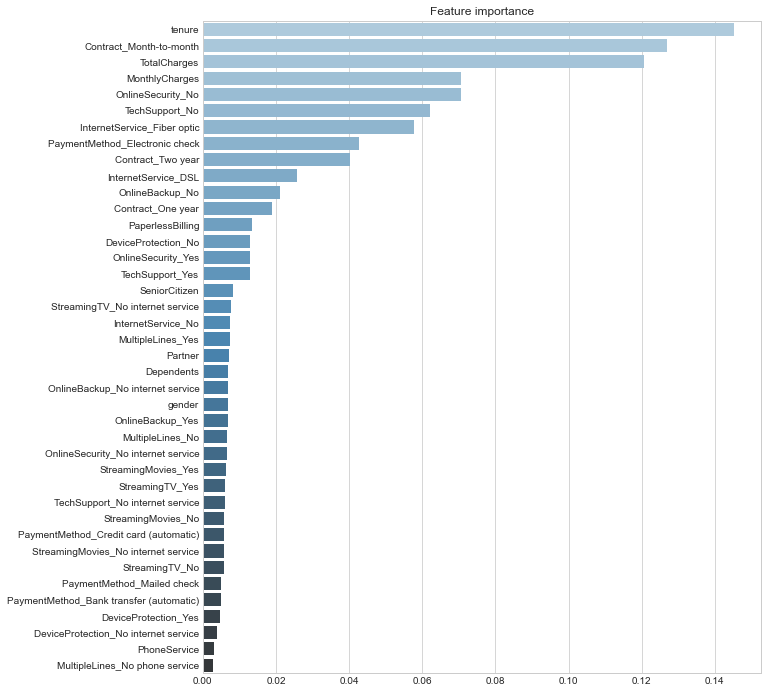

In [44]:
imp=pd.Series(data=clf.feature_importances_,index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title('Feature importance')
ax=sns.barplot(y=imp.index,x=imp.values,palette='Blues_d',orient='h')

In [43]:
imp

tenure                                     0.145303
Contract_Month-to-month                    0.126954
TotalCharges                               0.120581
MonthlyCharges                             0.070544
OnlineSecurity_No                          0.070487
TechSupport_No                             0.062213
InternetService_Fiber optic                0.057812
PaymentMethod_Electronic check             0.042816
Contract_Two year                          0.040173
InternetService_DSL                        0.025818
OnlineBackup_No                            0.021114
Contract_One year                          0.018827
PaperlessBilling                           0.013428
DeviceProtection_No                        0.013016
OnlineSecurity_Yes                         0.012913
TechSupport_Yes                            0.012838
SeniorCitizen                              0.008316
StreamingTV_No internet service            0.007689
InternetService_No                         0.007561
MultipleLine

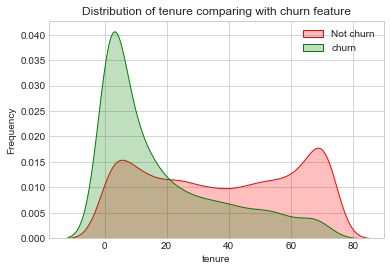

In [47]:
g=sns.kdeplot(final_df.tenure[(final_df['Churn']==0)],color='r',shade=True)
g=sns.kdeplot(final_df.tenure[(final_df['Churn']==1)],color='g',shade=True)
g.set_xlabel('tenure')
g.set_ylabel('Frequency')
plt.title('Distribution of tenure comparing with churn feature')
g=g.legend(['Not churn','churn'])

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
accuracy=lr.score(X_test,y_test)
print('Logistic regression accuracy score :',accuracy*100)

Logistic regression accuracy score : 81.19233498935415


In [50]:
from sklearn.metrics import f1_score
f1=f1_score(lr.predict(X_test),y_test)
print('f1 score:',f1)

f1 score: 0.6062407132243685


In [51]:
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test)
cm_lr=confusion_matrix(y_test,y_pred)
print(cm_lr)

[[940 121]
 [144 204]]


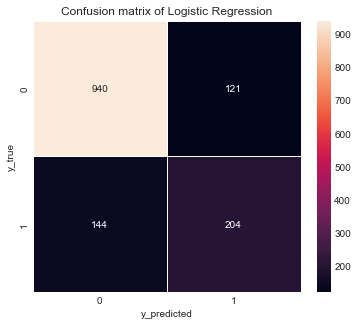

In [52]:
f,ax=plt.subplots(figsize=(6,5))
sns.heatmap(cm_lr,annot=True,linewidths=0.5,color='r',fmt='0.0f',ax=ax)
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.title('Confusion matrix of Logistic Regression')
plt.show()

In [57]:
from sklearn.model_selection import GridSearchCV
model_parameters={
    'C':[1,10,100,1000],
    'class_weight':['balanced',None]
}
model=LogisticRegression(penalty='l2')
gscv=GridSearchCV(estimator=model,param_grid=model_parameters,cv=5,verbose=1,scoring='f1')
gscv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None]},
             scoring='f1', verbose=1)

In [58]:
print('The best parameter are -',gscv.best_params_)

The best parameter are - {'C': 1, 'class_weight': 'balanced'}


In [59]:
final_mod=LogisticRegression(**gscv.best_params_)
final_mod.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced')

In [64]:
accuracy=final_mod.score(X_test,y_test)
print('Logistic accuracy score:',accuracy)
from sklearn.metrics import f1_score
f1=f1_score(final_mod.predict(X_test),y_test)
print('f1 score:',f1)

Logistic accuracy score: 0.7537260468417317
f1 score: 0.6248648648648649


In [68]:
list(zip(X_train.columns,final_mod.coef_[0]))

[('SeniorCitizen', 0.2177690144494822),
 ('tenure', -0.058146817227799664),
 ('MonthlyCharges', 0.005791014755923691),
 ('TotalCharges', 0.0003236048798899585),
 ('MultipleLines_No', -0.19083795429285508),
 ('MultipleLines_No phone service', 0.20423516928421873),
 ('MultipleLines_Yes', -0.0679564387541855),
 ('InternetService_DSL', -0.2656841096482904),
 ('InternetService_Fiber optic', 0.281457227042159),
 ('InternetService_No', -0.07033234113264197),
 ('OnlineSecurity_No', 0.20984501537697137),
 ('OnlineSecurity_No internet service', -0.07033234113264197),
 ('OnlineSecurity_Yes', -0.19407189797778052),
 ('OnlineBackup_No', 0.1082192836819745),
 ('OnlineBackup_No internet service', -0.07033234113264197),
 ('OnlineBackup_Yes', -0.09244616629525357),
 ('DeviceProtection_No', 0.09484960564334226),
 ('DeviceProtection_No internet service', -0.07033234113264197),
 ('DeviceProtection_Yes', -0.07907648825635986),
 ('TechSupport_No', 0.18630325510352622),
 ('TechSupport_No internet service', -

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_mod.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1061
           1       0.50      0.83      0.62       348

    accuracy                           0.75      1409
   macro avg       0.71      0.78      0.72      1409
weighted avg       0.82      0.75      0.77      1409



In [71]:
from sklearn.metrics import accuracy_score
pred_prob_df=pd.DataFrame(final_mod.predict_proba(X_test)[:,1])
threshold_list=[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9]

for i in threshold_list:
    print('For Threshold={}'.format(i))
    y_test_pred=pred_prob_df.applymap(lambda x:1 if x>i else 0)
    test_accuracy=accuracy_score(y_test,y_test_pred)
    print('Accuracy{}'.format(test_accuracy))
    print()

For Threshold=0
Accuracy0.24698367636621718

For Threshold=0.05
Accuracy0.38821859474804826

For Threshold=0.1
Accuracy0.46202980837473384

For Threshold=0.15
Accuracy0.5266146202980837

For Threshold=0.2
Accuracy0.5805535841022001

For Threshold=0.25
Accuracy0.6238466997870831

For Threshold=0.3
Accuracy0.6593328601845281

For Threshold=0.35
Accuracy0.6820440028388929

For Threshold=0.4
Accuracy0.7118523775727467

For Threshold=0.45
Accuracy0.7317246273953159

For Threshold=0.5
Accuracy0.7537260468417317

For Threshold=0.55
Accuracy0.7636621717530163

For Threshold=0.6
Accuracy0.7764371894960965

For Threshold=0.65
Accuracy0.7955997161107168

For Threshold=0.7
Accuracy0.7998580553584103

For Threshold=0.75
Accuracy0.8218594748048261

For Threshold=0.8
Accuracy0.8133427963094393

For Threshold=0.9
Accuracy0.765791341376863

